## PROJECT MEMBERS
    
    ABIJITH M G
    SHRIPAD HEGDE
    ANAND P
    CHRISTY JOSEPH
   


## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error



## Load the dataset

In [2]:
data = pd.read_excel('service-data.xlsx')
data.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


## EDA

In [3]:
data.shape

(28484, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28484 entries, 0 to 28483
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice Date           28482 non-null  datetime64[ns]
 1   Job Card Date          28482 non-null  datetime64[ns]
 2   Business Partner Name  28484 non-null  object        
 3   Vehicle No.            28484 non-null  object        
 4   Vehicle Model          28482 non-null  object        
 5   Current KM Reading     28482 non-null  float64       
 6   INVOICE LINE TEXT      28449 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.5+ MB


In [5]:
data.describe()

,Current KM Reading
count,28482.000000
mean,19348.003827
std,25246.722306
min,0.000000
25%,3988.000000
50%,12420.500000
75%,27905.000000
max,610112.000000


In [6]:
data.isnull().sum()

Invoice Date              2
Job Card Date             2
Business Partner Name     0
Vehicle No.               0
Vehicle Model             2
Current KM Reading        2
INVOICE LINE TEXT        35
dtype: int64

In [7]:
data.isnull().mean().round(4)*100    #Percentage of missing values

Invoice Date             0.01
Job Card Date            0.01
Business Partner Name    0.00
Vehicle No.              0.00
Vehicle Model            0.01
Current KM Reading       0.01
INVOICE LINE TEXT        0.12
dtype: float64

In [8]:
data.dropna(inplace=True)  #Dropping missing values because it is less than 1% of the entire data


In [9]:
data.shape

(28448, 7)

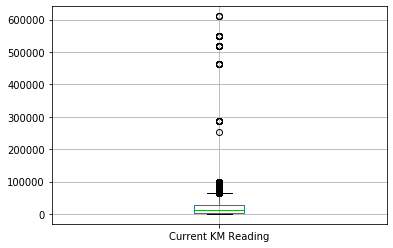

In [10]:
data.boxplot()

In [11]:
Counter(data['INVOICE LINE TEXT']).most_common()

[('ENGINE OIL', 3802),
 ('CHAIN LUBRICATION', 3441),
 ('GENERAL SERVICE', 2142),
 ('AIR FILTER', 1715),
 ('3M OIL', 1628),
 ('CONSUMABLES', 1595),
 ('POLISH', 1245),
 ('DISC OIL', 991),
 ('BRAKE SHOE', 965),
 ('OIL FILTER', 821),
 ('DISC PAD', 575),
 ('WHEEL RUBBER', 521),
 ('AIR FILTER CHECKUP', 467),
 ('SPARK PLUG', 421),
 ('CHAIN SPROCKET', 396),
 ('SPROCKET RUBBER', 347),
 ('SPROCKET BEARING', 314),
 ('CHAIN OVERHAUL', 284),
 ('CLUTCH CABLE', 263),
 ('CLUTCH ASSEMBLY', 212),
 ('CLUTCH COVER GASKET', 190),
 ('CLUTCH OVERHUAL', 163),
 ('TANK COVER', 134),
 ('LABOUR', 131),
 ('SEAT COVER', 119),
 ('INDICATOR', 110),
 ('DISC PUMP KIT', 104),
 ('DRUM BOLT', 103),
 ('TAIL LAMP BULB', 101),
 ('FOOT REST', 99),
 ('CLUTCH LEVER', 98),
 ('FORK OIL', 95),
 ('MIRROR', 91),
 ('BATTERY', 83),
 ('TENSIONER', 79),
 ('DISC OVERHUAL', 79),
 ('HEAD LIGHT BULB', 79),
 ('TIMMING CHAIN', 78),
 ('PARKING BULB', 77),
 ('TIMMING CHAIN PAD', 73),
 ('FORK OVERHUAL', 72),
 ('clutch cable', 72),
 ('COOLANT OIL

In [12]:
data['INVOICE LINE TEXT'].nunique()

502

In [13]:
Counter(data['Vehicle Model']).most_common()


[('BAJAJ PULSAR 150', 8614),
 ('BAJAJ AVENGER STREET 220', 4212),
 ('BAJAJ PULSAR 220', 2654),
 ('BAJAJ PULSAR 180', 2251),
 ('BAJAJ PULSAR NS 200', 2203),
 ('BAJAJ CT 100', 1432),
 ('BAJAJ DISCOVER 125', 1345),
 ('BAJAJ AVENGER STREET', 1111),
 ('BAJAJ PLATINA', 843),
 ('BAJAJ V150', 685),
 ('BAJAJ DISCOVER', 678),
 ('BAJAJ PULSAR LS135', 518),
 ('BAJAJ PULSAR AS 200', 421),
 ('BAJAJ PULSAR NS 160', 364),
 ('BAJAJ PULSAR RS 200', 322),
 ('BAJAJ DISCOVER 150', 282),
 ('BAJAJ AVENGER STREET 180', 122),
 ('BAJAJ DISCOVER 135', 115),
 ('BAJAJ V125', 95),
 ('BAJAJ V', 51),
 ('BAJAJ CALIBER', 40),
 ('BAJAJ XCD 125', 27),
 ('BAJAJ V15', 23),
 ('BAJAJ XCD 135', 13),
 ('WAVE', 10),
 ('BAJAJ DOMINAR 400 ABS', 7),
 ('BAJAJ WIND 125', 6),
 ('BAJAJ BOXER CT', 4)]

In [14]:
data['Vehicle Model'].nunique()

28

In [15]:
data.drop(['Business Partner Name','Vehicle No.'],axis=1,inplace=True)     #Dropping columns since values are masked
                               

In [16]:
data.head(2)

,Invoice Date,Job Card Date,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,BAJAJ PULSAR NS 200,758.0,ENGINE OIL


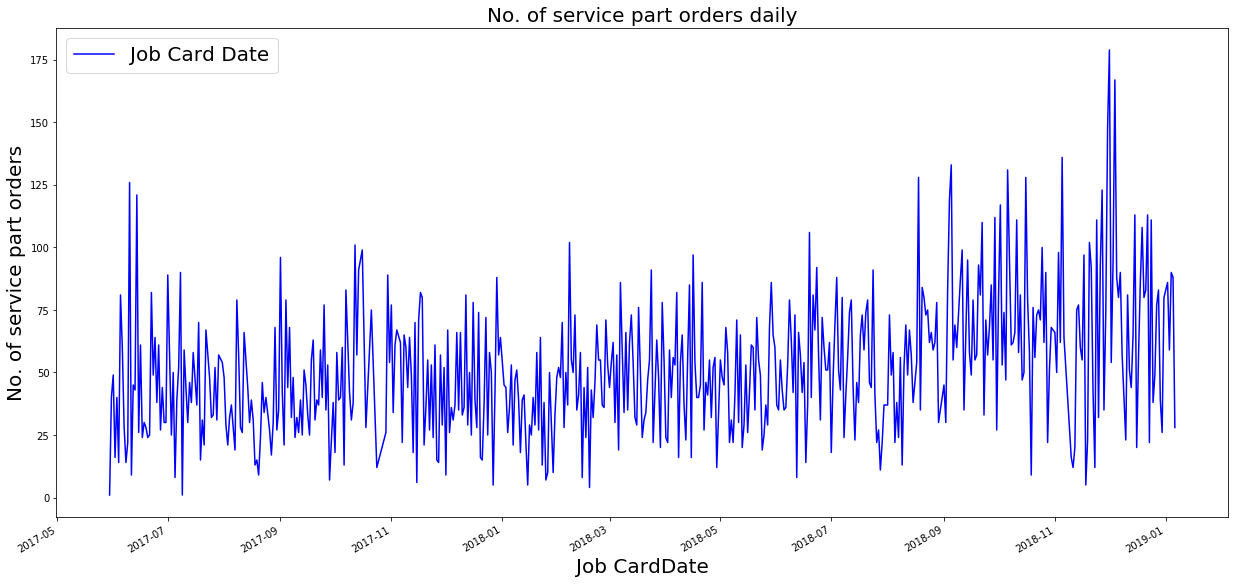

In [17]:
d1=data.groupby(['Job Card Date'])['Job Card Date'].count()
d1.plot(kind='line',figsize=[21,10],color='blue')
plt.title("No. of service part orders daily",fontdict={'fontsize':20,'color':'black'},loc='center')
plt.ylabel("No. of service part orders",fontdict={'fontsize':20})
plt.xlabel("Job CardDate",fontdict={'fontsize':20})
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=20)

Text(0.5, 1.0, 'Most sold service parts')

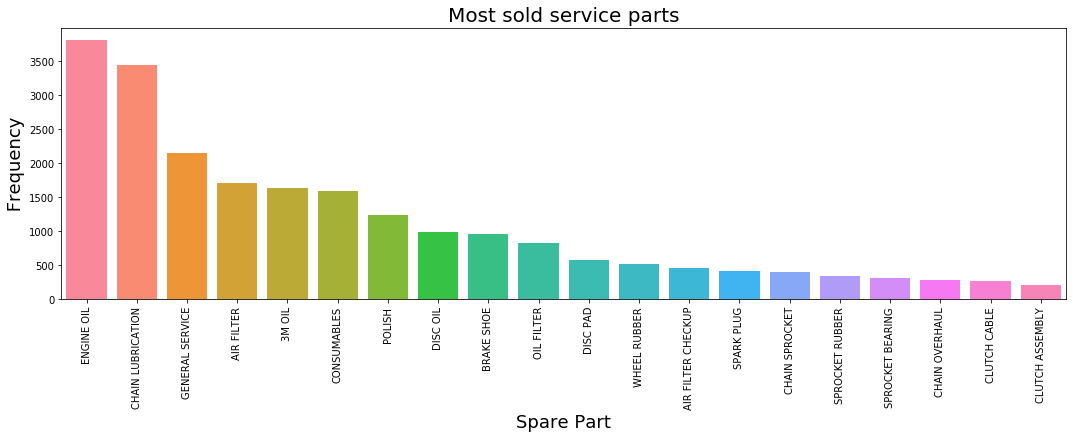

In [18]:
plt.figure(figsize=(18,5))
sns.countplot(data['INVOICE LINE TEXT'],order=data['INVOICE LINE TEXT'].value_counts().index[:20],saturation=10)
plt.xticks(rotation=90)
plt.xlabel("Spare Part",fontsize=18)
plt.ylabel(" Frequency ",fontsize=18)
plt.title("Most sold service parts",fontdict={'fontsize':20})

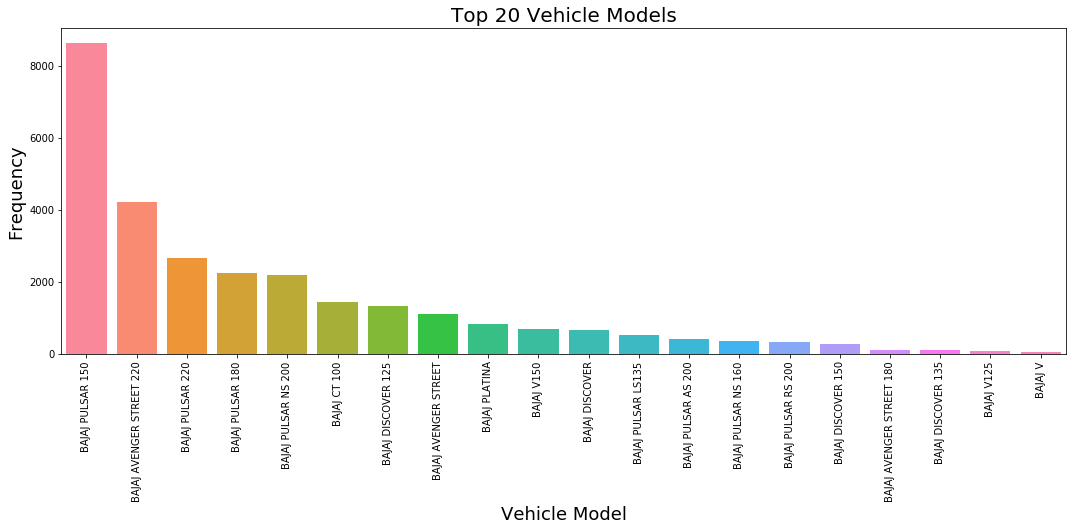

In [19]:
plt.figure(figsize=[18,6])
sns.countplot(data['Vehicle Model'],order=data['Vehicle Model'].value_counts().iloc[:20].index,saturation=10)
plt.xlabel('Vehicle Model',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xticks(rotation=90)
plt.title("Top 20 Vehicle Models",fontdict={'fontsize':20});

In [20]:
#Function to find the spare part items which contribute more than 2% of the entire data
def StockPercentage(inventory):
    invoice = dict(Counter(inventory['INVOICE LINE TEXT']))
    invoiceList = list(invoice)
    stockPercentage = []
    stockPercentageIndex = []
    sortedStock = []    
    for i in list(invoice):
        stockPercentage.append(invoice[i]/len(data)*100)

    for i in range(0,len(stockPercentage)):
        if stockPercentage[i] > 2:
            stockPercentageIndex.append(i)

    for i in stockPercentageIndex:
        sortedStock.append(invoiceList[i])
    return sortedStock

In [21]:
usefulStock =StockPercentage(data)
usefulStock

['ENGINE OIL',
 'POLISH',
 'CONSUMABLES',
 'CHAIN LUBRICATION',
 '3M OIL',
 'GENERAL SERVICE',
 'OIL FILTER',
 'DISC PAD',
 'AIR FILTER',
 'BRAKE SHOE',
 'DISC OIL']

In [22]:
usefulStock.remove('GENERAL SERVICE')  #Removed 'GENERAL SERVICE' because it is not a spare part item
usefulStock

['ENGINE OIL',
 'POLISH',
 'CONSUMABLES',
 'CHAIN LUBRICATION',
 '3M OIL',
 'OIL FILTER',
 'DISC PAD',
 'AIR FILTER',
 'BRAKE SHOE',
 'DISC OIL']

In [23]:
#Function to find the vehicle models which contribute more than 2% of the entire data
def VehiclePercentage(vehicles):
    vehicle = dict(Counter(vehicles['Vehicle Model']))
    vehicleList = list(vehicle)
    vehiclePercentage = []
    vehiclePercentageIndex = []
    sortedVehicle = []
    
    for i in list(vehicle):
        vehiclePercentage.append(vehicle[i]/len(data)*100)
        
    for i in range(0,len(vehiclePercentage)):
        if vehiclePercentage[i] >2 :
            vehiclePercentageIndex.append(i)
    
    for i in vehiclePercentageIndex:
        sortedVehicle.append(vehicleList[i])
    return sortedVehicle

In [24]:
usefulVehicle = VehiclePercentage(data)
usefulVehicle

['BAJAJ AVENGER STREET 220',
 'BAJAJ PULSAR NS 200',
 'BAJAJ PLATINA',
 'BAJAJ PULSAR 150',
 'BAJAJ PULSAR 220',
 'BAJAJ PULSAR 180',
 'BAJAJ AVENGER STREET',
 'BAJAJ CT 100',
 'BAJAJ DISCOVER',
 'BAJAJ DISCOVER 125',
 'BAJAJ V150']

In [25]:
#Creating a new dataframe with only the needed columns
requiredData = data[['Job Card Date','INVOICE LINE TEXT','Vehicle Model']]
columnNames = ['Date','Stock','Model']
requiredData.columns = columnNames
requiredData.head()

,Date,Stock,Model
0,2017-05-30,ENGINE OIL,BAJAJ AVENGER STREET 220
1,2017-05-31,ENGINE OIL,BAJAJ PULSAR NS 200
2,2017-05-31,POLISH,BAJAJ PULSAR NS 200
3,2017-05-31,CONSUMABLES,BAJAJ PULSAR NS 200
4,2017-05-31,COOLANT OIL,BAJAJ PULSAR NS 200


In [26]:
requiredData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    28448 non-null  datetime64[ns]
 1   Stock   28448 non-null  object        
 2   Model   28448 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.1+ MB


In [27]:
requiredData.shape

(28448, 3)

In [28]:
#Function to calculate the monthly stock of each spare part item for a particular vehicel model
def monthlyStock(model,stock_name,datas):
    print('Model name is ',model)
    print('Stock name is ',stock_name)
    

    datas.loc[(datas.Stock == stock_name)&(datas.Model==model), 'Stocks'] = 1
    datas.loc[(datas.Stock != stock_name)|(datas.Model!=model), 'Stocks'] = 0
    
    year = 2017
    month = 5
    tempYear = 0
    tempMonth = 0
    
    stockCount = 0
    dateColumn = []
    stockColumn = []
    for i,j in datas.iterrows():
        try:
            tempYear = j.Date.year
            tempMonth = j.Date.month

            if(tempYear == year and tempMonth == month):
                stockCount += j.Stocks
            else:
                dateColumn.append(str(year)+"-"+str(month))
                stockColumn.append(stockCount)
                stockCount = 0
                year = tempYear
                month = tempMonth
                stockCount += j.Stocks
            
        except:
            continue
    
    final_dict = {'Date':dateColumn,'Stock':stockColumn}
    
    from pandas import datetime
    def parser(x):
        return datetime.strptime(x,'%Y-%m')#-%d')
    individualStock = pd.DataFrame(data=final_dict)
    individualStock.Date = individualStock.Date.apply(lambda d: datetime.strptime(d, "%Y-%m"))
    individualStock.set_index('Date', inplace = True)
    return individualStock

In [29]:
req = monthlyStock('BAJAJ PULSAR 150','ENGINE OIL',requiredData)

Model name is  BAJAJ PULSAR 150
Stock name is  ENGINE OIL


In [30]:
req.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-05-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stock   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [31]:
req.isna().sum()

Stock    0
dtype: int64

In [32]:
req

,Stock
Date,
2017-05-01,1.0
2017-06-01,52.0
2017-07-01,54.0
2017-08-01,34.0
2017-09-01,58.0
2017-10-01,46.0
2017-11-01,63.0
2017-12-01,49.0
2018-01-01,43.0


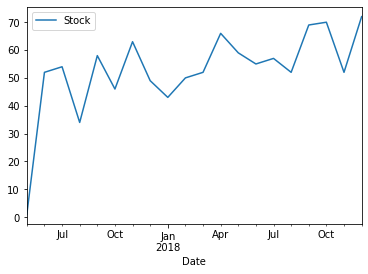

In [33]:
req.plot()

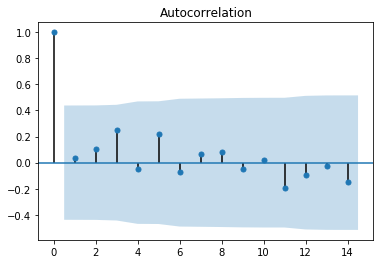

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(req);

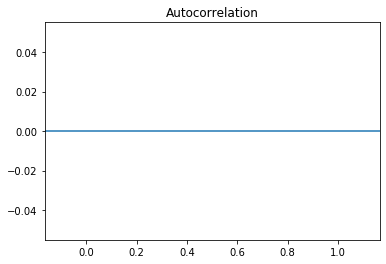

In [35]:
req_diff = req.diff(periods=1)
plot_acf(req_diff);

## Time-Series Modelling

### auto_arima model

Model name is  BAJAJ AVENGER STREET 220
Stock name is  ENGINE OIL
Monthly Stock
             Stock
Date             
2017-05-01    1.0
2017-06-01   26.0
2017-07-01   23.0
2017-08-01   25.0
2017-09-01   28.0
2017-10-01   28.0
2017-11-01   35.0
2017-12-01   43.0
2018-01-01   31.0
2018-02-01   34.0
2018-03-01   28.0
2018-04-01   36.0
2018-05-01   33.0
2018-06-01   36.0
2018-07-01   33.0
2018-08-01   37.0
2018-09-01   21.0
2018-10-01   38.0
2018-11-01   32.0
2018-12-01   22.0
Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=113.921, BIC=118.169, Time=0.237 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=109.101, BIC=110.517, Time=0.005 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=108.027, BIC=110.151, Time=0.066 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=108.490, BIC=110.614, Time=0.053 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=108.381, BIC=109.089, Time=0.019 seconds

Monthly Stock
             Stock
Date             
2017-05-01    0.0
2017-06-01   13.0
2017-07-01    9.0
2017-08-01   13.0
2017-09-01   12.0
2017-10-01   13.0
2017-11-01   15.0
2017-12-01   14.0
2018-01-01    9.0
2018-02-01   12.0
2018-03-01   13.0
2018-04-01   14.0
2018-05-01    9.0
2018-06-01   14.0
2018-07-01   14.0
2018-08-01   18.0
2018-09-01    7.0
2018-10-01   11.0
2018-11-01   11.0
2018-12-01    3.0
Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=97.424, BIC=102.059, Time=0.380 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=92.466, BIC=94.011, Time=0.011 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=94.386, BIC=96.703, Time=0.073 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=94.425, BIC=96.742, Time=0.042 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=128.483, BIC=129.256, Time=0.008 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=94.689, BIC=97.78

Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=91.509, BIC=93.633, Time=0.190 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=96.110, BIC=96.818, Time=0.028 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=95.270, BIC=98.810, Time=0.482 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=94.137, BIC=97.677, Time=0.509 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=97.117, BIC=102.074, Time=0.726 seconds
Near non-invertible roots for order (3, 1, 2)(0, 0, 0,

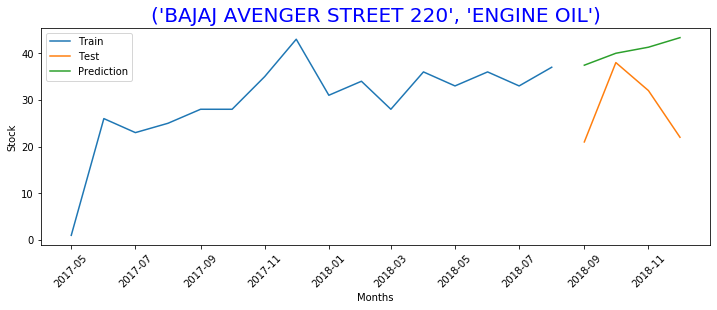

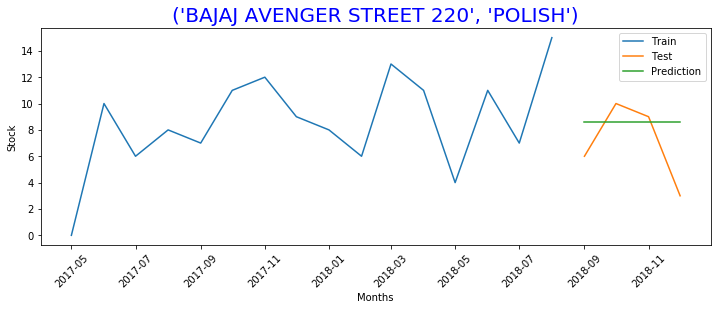

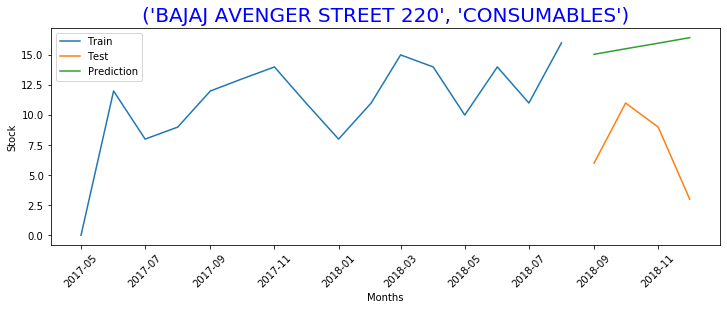

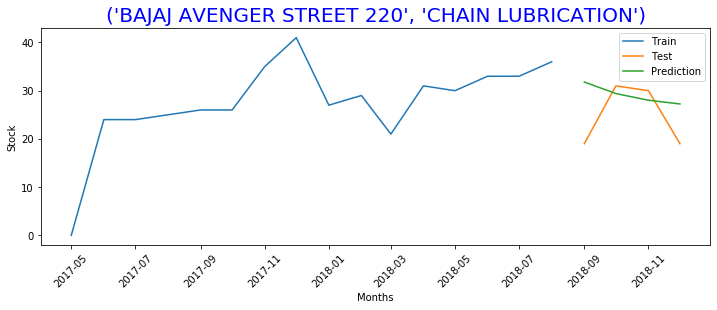

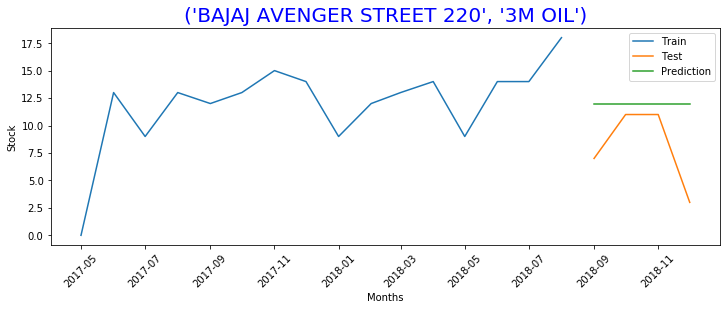

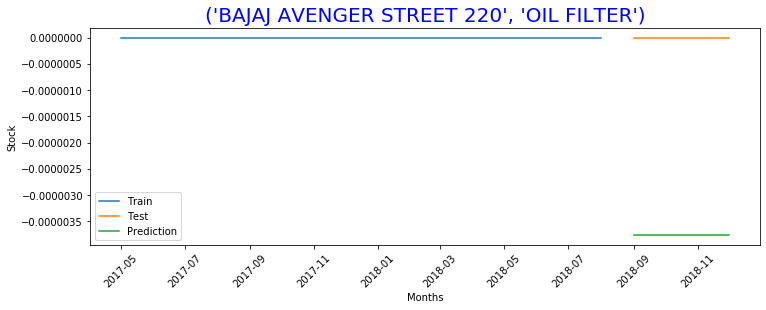

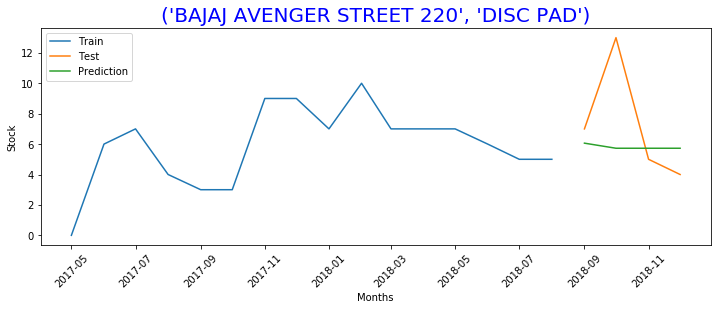

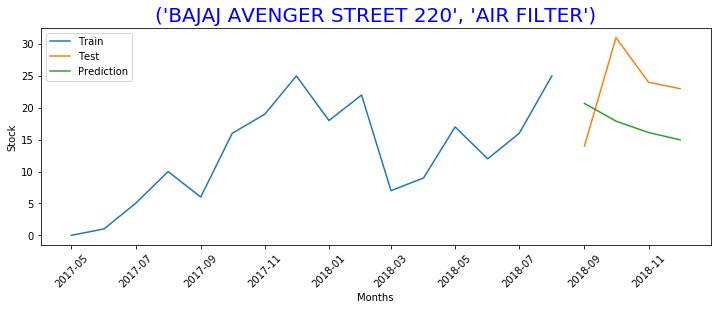

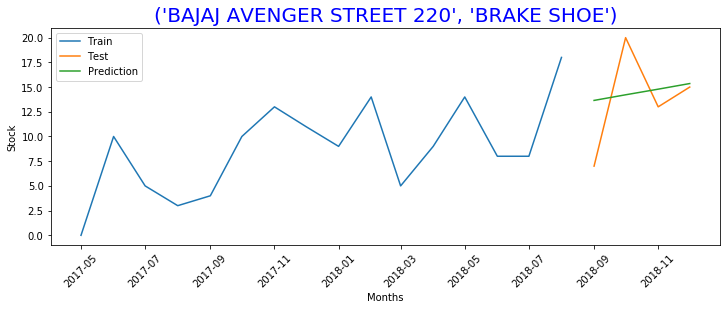

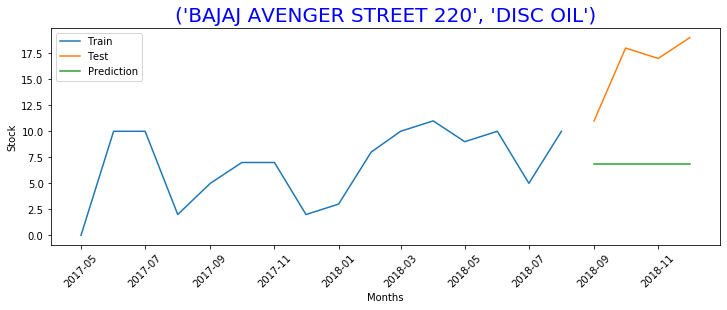

In [36]:
for vehicle in usefulVehicle:
    for stock in usefulStock:
        required = monthlyStock(vehicle,stock,requiredData)
        print('Monthly Stock\n',required)
        totalCount = required.shape[0]
        trainCount = int(totalCount*0.80)
        testCount = int(totalCount-trainCount)
        
        train = required[0:trainCount]
        test = required[trainCount:]
    
    
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
        model.fit(train)
        print(model.summary().tables[1])

        forecast = model.predict(n_periods=len(test))
        forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
        print(forecast)
        MSE = np.sqrt(mean_squared_error(test,forecast))
        print('RMSE :',MSE)

        #plot the predictions for validation set
        plt.figure(figsize=(12,4))
        plt.title((vehicle,stock),fontdict={'fontsize':20,'color':'blue'},loc='center')
        plt.plot(train, label='Train')
        plt.plot(test, label='Test')
        plt.plot(forecast, label='Prediction')
        plt.legend()
        plt.xlabel('Months')
        plt.ylabel('Stock')
        plt.xticks(rotation=45)
        #plt.savefig("%s_%s.png"%(stock,vehicle))
        print(stock,'for',vehicle,'finished \n')
        #break
    break

### AR model

Model name is  BAJAJ AVENGER STREET 220
Stock name is  ENGINE OIL
Monthly Stock
             Stock
Date             
2017-05-01    1.0
2017-06-01   26.0
2017-07-01   23.0
2017-08-01   25.0
2017-09-01   28.0
2017-10-01   28.0
2017-11-01   35.0
2017-12-01   43.0
2018-01-01   31.0
2018-02-01   34.0
2018-03-01   28.0
2018-04-01   36.0
2018-05-01   33.0
2018-06-01   36.0
2018-07-01   33.0
2018-08-01   37.0
2018-09-01   21.0
2018-10-01   38.0
2018-11-01   32.0
2018-12-01   22.0
Prediction:
 2018-09-01    34.564129
2018-10-01    37.386740
2018-11-01    34.420242
2018-12-01    37.593698
2019-01-01    35.801042
2019-02-01    38.534182
2019-03-01    36.620053
2019-04-01    38.896824
Freq: MS, dtype: float64
RMSE : 10.408922694215965
ENGINE OIL for BAJAJ AVENGER STREET 220 finished

Model name is  BAJAJ AVENGER STREET 220
Stock name is  POLISH
Monthly Stock
             Stock
Date             
2017-05-01    0.0
2017-06-01   10.0
2017-07-01    6.0
2017-08-01    8.0
2017-09-01    7.0
2017-10-01   1

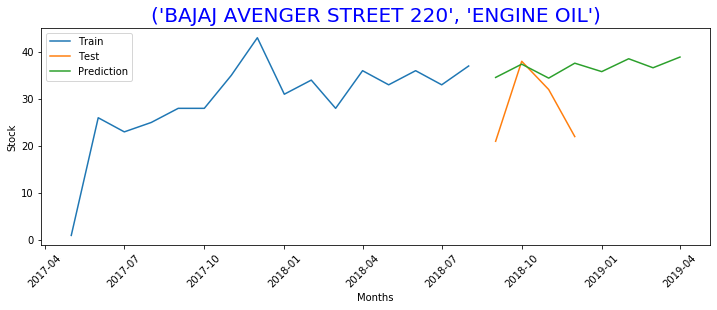

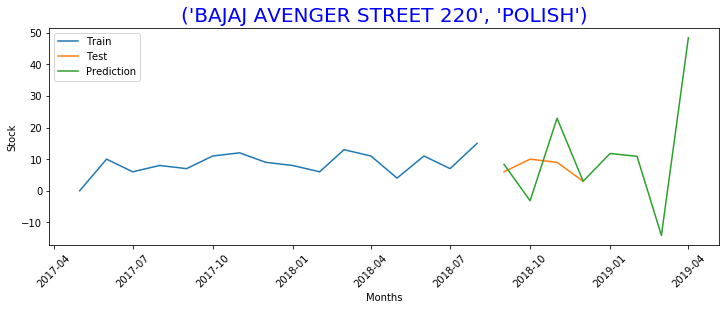

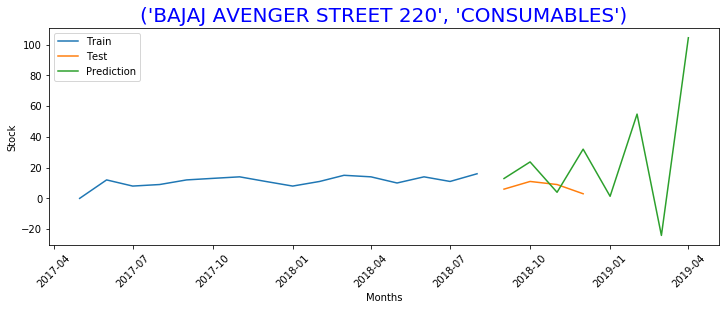

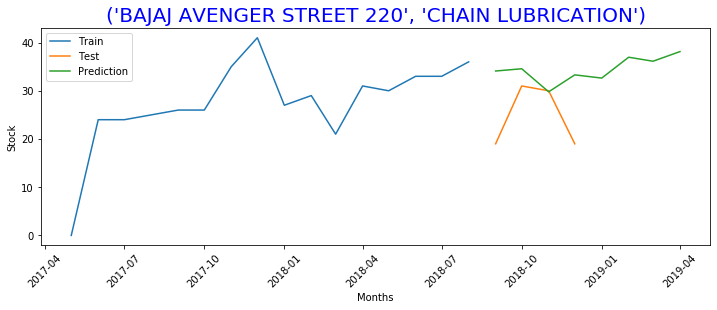

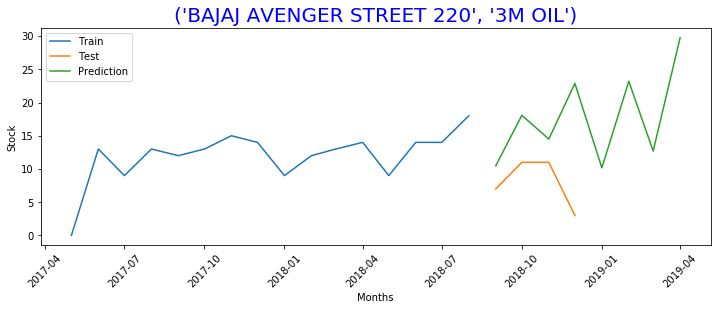

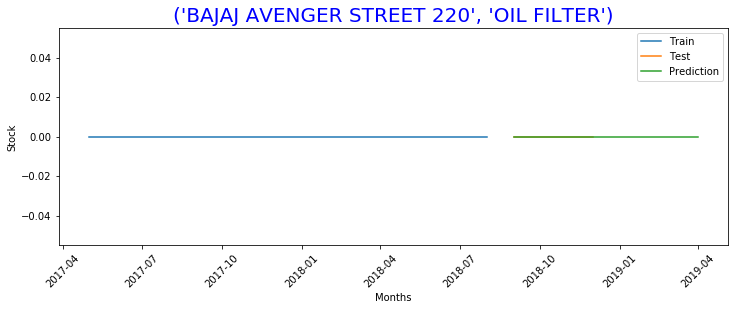

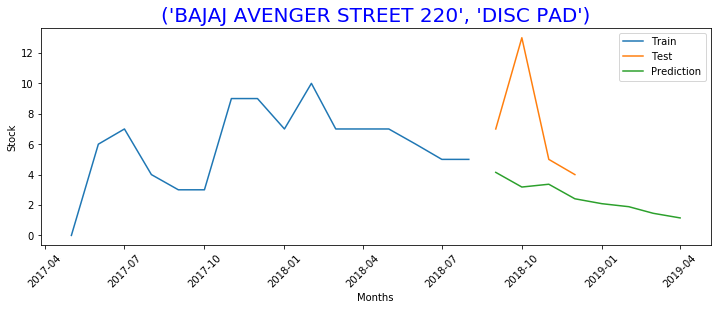

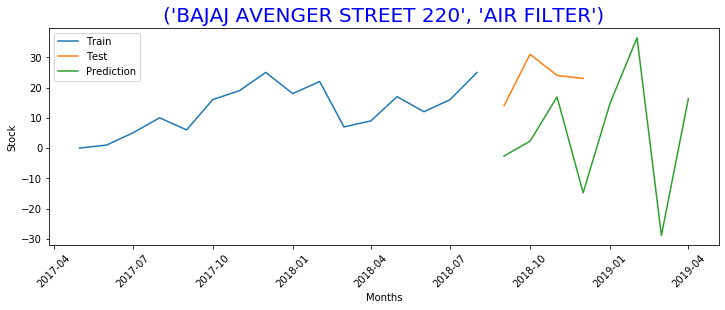

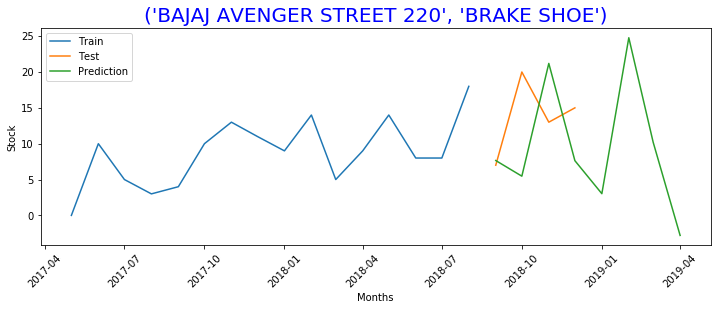

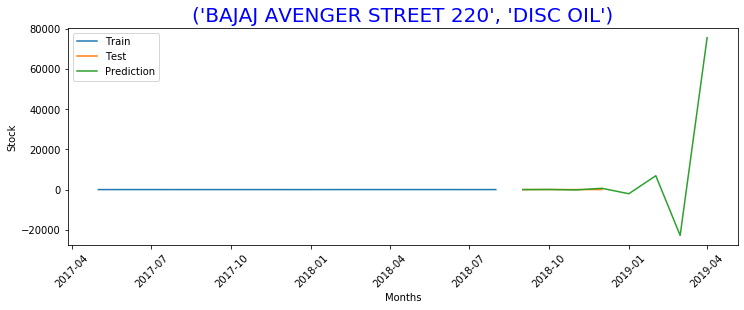

In [42]:
for vehicle in usefulVehicle:
    for stock in usefulStock:
        required_ar = monthlyStock(vehicle,stock,requiredData)
        print('Monthly Stock\n',required_ar)
        totalCount = required_ar.shape[0]
        trainCount = int(totalCount*0.80)
        testCount = int(totalCount-trainCount)
        
        train = required_ar[0:trainCount]
        test = required_ar[trainCount:]    
    
        model_ar = AR(train)
        model_ar_fit = model_ar.fit(ic='aic')
       
        predictions_ar = model_ar_fit.predict(start=16,end=23)
        print('Prediction:\n',predictions_ar)
        MSE = np.sqrt(mean_squared_error(test,predictions_ar[0:4]))
        print('RMSE :',MSE)

        #plot the predictions for validation set
        plt.figure(figsize=(12,4))
        plt.title((vehicle,stock),fontdict={'fontsize':20,'color':'blue'},loc='center')
        plt.plot(train, label='Train')
        plt.plot(test, label='Test')
        plt.plot(predictions_ar, label='Prediction')
        plt.legend()
        plt.xlabel('Months')
        plt.ylabel('Stock')
        plt.xticks(rotation=45)
        #plt.savefig("%s_%s.png"%(stock,vehicle))
        print(stock,'for',vehicle,'finished\n')
        #break
    break

### ARIMA MODEL

Model name is  BAJAJ AVENGER STREET 220
Stock name is  ENGINE OIL
Monthly Stock
             Stock
Date             
2017-05-01    1.0
2017-06-01   26.0
2017-07-01   23.0
2017-08-01   25.0
2017-09-01   28.0
2017-10-01   28.0
2017-11-01   35.0
2017-12-01   43.0
2018-01-01   31.0
2018-02-01   34.0
2018-03-01   28.0
2018-04-01   36.0
2018-05-01   33.0
2018-06-01   36.0
2018-07-01   33.0
2018-08-01   37.0
2018-09-01   21.0
2018-10-01   38.0
2018-11-01   32.0
2018-12-01   22.0
104.76362471631177
            Prediction
Date                  
2018-09-01   28.411759
2018-10-01   25.858756
2018-11-01   22.871930
2018-12-01   19.451280
RMSE : 8.546367723152331
ENGINE OIL for BAJAJ AVENGER STREET 220 finished

Model name is  BAJAJ AVENGER STREET 220
Stock name is  POLISH
Monthly Stock
             Stock
Date             
2017-05-01    0.0
2017-06-01   10.0
2017-07-01    6.0
2017-08-01    8.0
2017-09-01    7.0
2017-10-01   11.0
2017-11-01   12.0
2017-12-01    9.0
2018-01-01    8.0
2018-02-01    6.

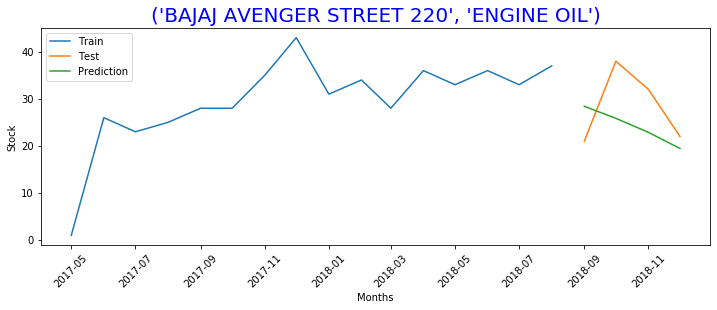

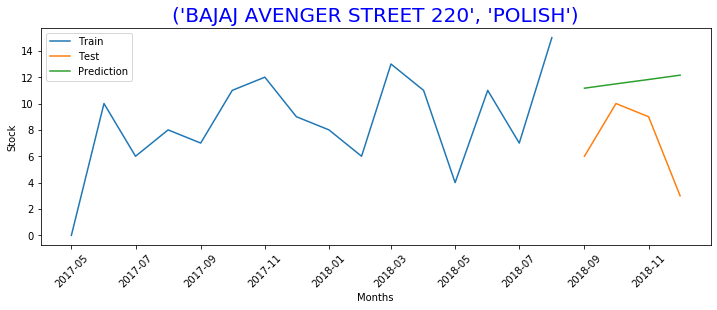

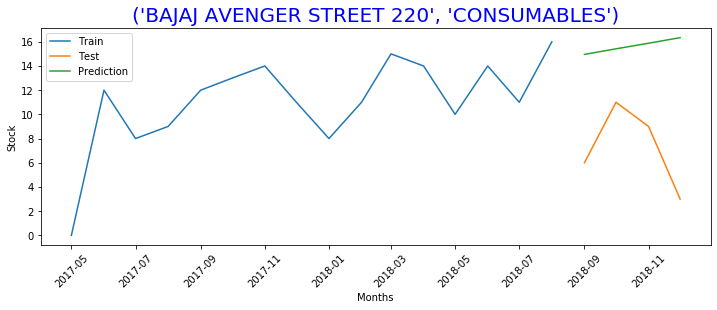

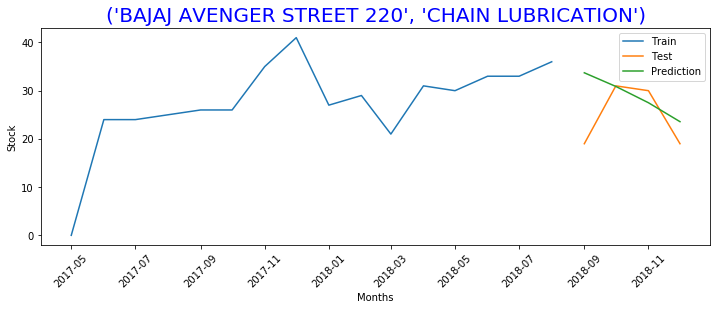

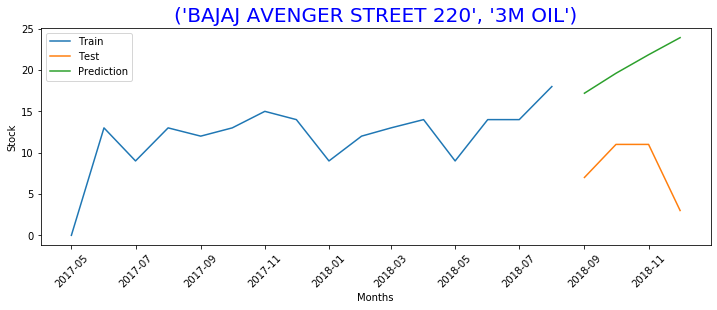

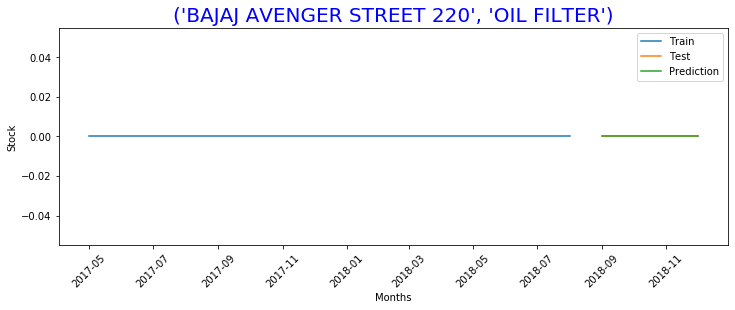

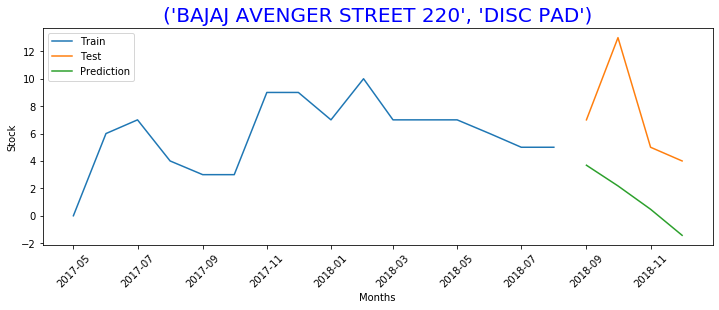

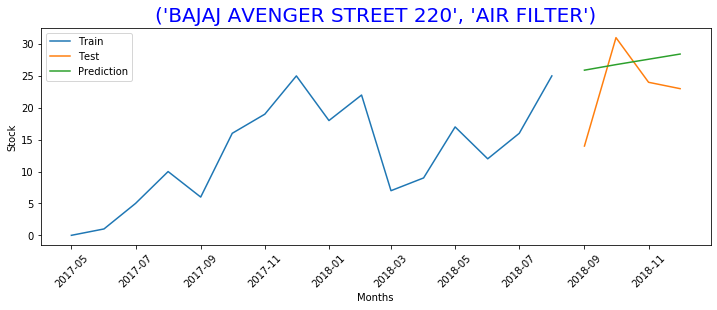

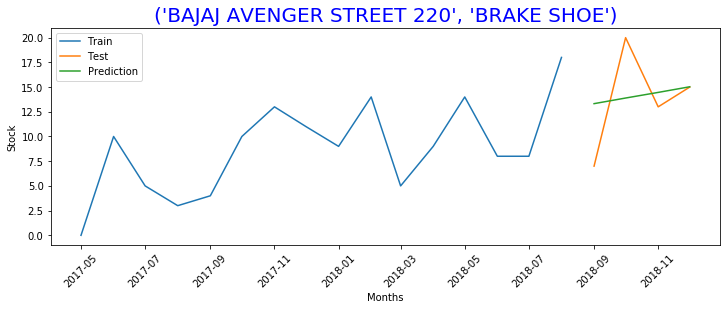

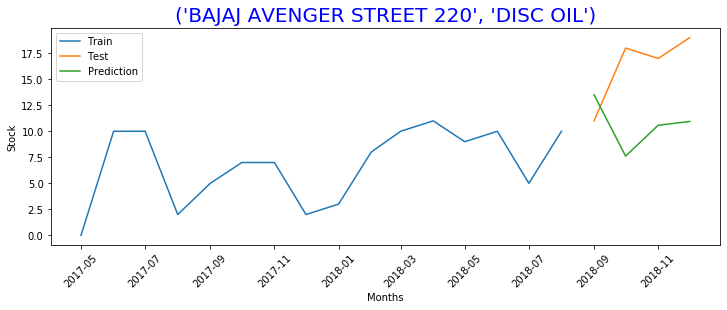

In [39]:
import warnings 
warnings.filterwarnings('ignore')
for vehicle in usefulVehicle:
    for stock in usefulStock:
        required_arima = monthlyStock(vehicle,stock, requiredData)
        print('Monthly Stock\n',required_arima)
        totalCount = required_arima.shape[0]
        trainCount = int(totalCount*0.80)
        testCount = int(totalCount-trainCount)
        
        train = required_arima[0:trainCount]
        test = required_arima[trainCount:]   
        
        def findPDQ():
            p=0
            d=0
            q=0
            min_value_aic = float("inf")
            for i in range(0,5):
                for j in range(0,5):
                    for k in range(0,5):
                        try:
                            model_arima_find = ARIMA(train,order = (i,j,k))
                            model_arima_fit = model_arima_find.fit()
                            aic = model_arima_fit.aic
                            if aic<min_value_aic:
                                min_value_aic = aic
                                p=i
                                d=j
                                q=k
                        except:
                            continue
               
            return [p,d,q]
    
        bestPDQ = findPDQ()
        model_arima = ARIMA(train,order=(bestPDQ))
        model_arima_fit=model_arima.fit()
        print(model_arima_fit.aic) #  Akaike Information Criteria 

        prediction_arima = model_arima_fit.forecast(steps=4)[0]
        prediction_arima = pd.DataFrame(prediction_arima,index = test.index,columns=['Prediction'])
        print(prediction_arima)
        
        MSE = np.sqrt(mean_squared_error(test,prediction_arima[0:4]))
        print('RMSE :',MSE)

        #plot the predictions for validation set
        plt.figure(figsize=(12,4))
        plt.title((vehicle,stock),fontdict={'fontsize':20,'color':'blue'},loc='center')
        plt.plot(train, label='Train')
        plt.plot(test, label='Test')
        plt.plot(prediction_arima, label='Prediction')
        plt.legend()
        plt.xlabel('Months')
        plt.ylabel('Stock')
        plt.xticks(rotation=45)
        #plt.savefig("%s_%s.png"%(stock,vehicle))
        print(stock,'for',vehicle,'finished\n')
        #break
    break

In [ ]:
#The approach is taking monthly stock of each spare part item of each vehicle model and predicting the future stock.
